# Guía 3: Dataframes en R parte 2
Computación 2, IES.
Profesor: Eduardo Jorquera, eduardo.jorquera@postgrado.uv.cl

## Resumir información

### Nombres de bebés

El primer dataset que exploraremos es el dataset de nombres de bebés, que consiste en el top 1.000 nombres de bebés para niños y niñas en los Estados Unidos, desde 1880 al 2008. Consiste en 258.000 registros (1000 x 2 x 129) con 5 variables: year, name, soundex, sex and prop.

Los datos están aquí: https://ramnathv.github.io/pycon2014-r/explore/data/bnames2.csv.bz2

Impórtelos a R usando:

In [15]:
bnames2 <- read.csv("bnames2.csv.bz2")
head(bnames2)

year,name,prop,sex,soundex
<int>,<fct>,<dbl>,<fct>,<fct>
1880,John,0.081541,boy,J500
1880,William,0.080511,boy,W450
1880,James,0.050057,boy,J520
1880,Charles,0.045167,boy,C642
1880,George,0.043292,boy,G620
1880,Frank,0.027380,boy,F652


Hay muchas preguntas interesantes que podrían plantearse. Empecemos con una sencilla para obtener la popularidad de un nombre específico en el tiempo. Es usual para las personas tratar de rastrear su propio nombre :-)

In [16]:
ed <- subset(bnames2, name == "Eduardo")
head(ed)

,year,name,prop,sex,soundex
,<int>,<fct>,<dbl>,<fct>,<fct>
10638,1890,Eduardo,0.000084,boy,E363
13855,1893,Eduardo,0.000058,boy,E363
14575,1894,Eduardo,0.000104,boy,E363
16921,1896,Eduardo,0.000054,boy,E363
20802,1900,Eduardo,0.000068,boy,E363
21693,1901,Eduardo,0.000087,boy,E363


Es una sorpresa que mi nombre se encuentre allí. Exploremos visualmente estos datos filtrados usando la librería ggplot2 (muy famosa, por cierto). Tómalo como una pequeña introducción a este paquete, quién sabe, quizás podría servirte para cuando hagas tu tesis.

El siguiente codigo se explica por sí mismo; usamos la función `qplot`, que es para un **q**uickplot; y dibujando una línea sobre el tiempo (year) vs prop.

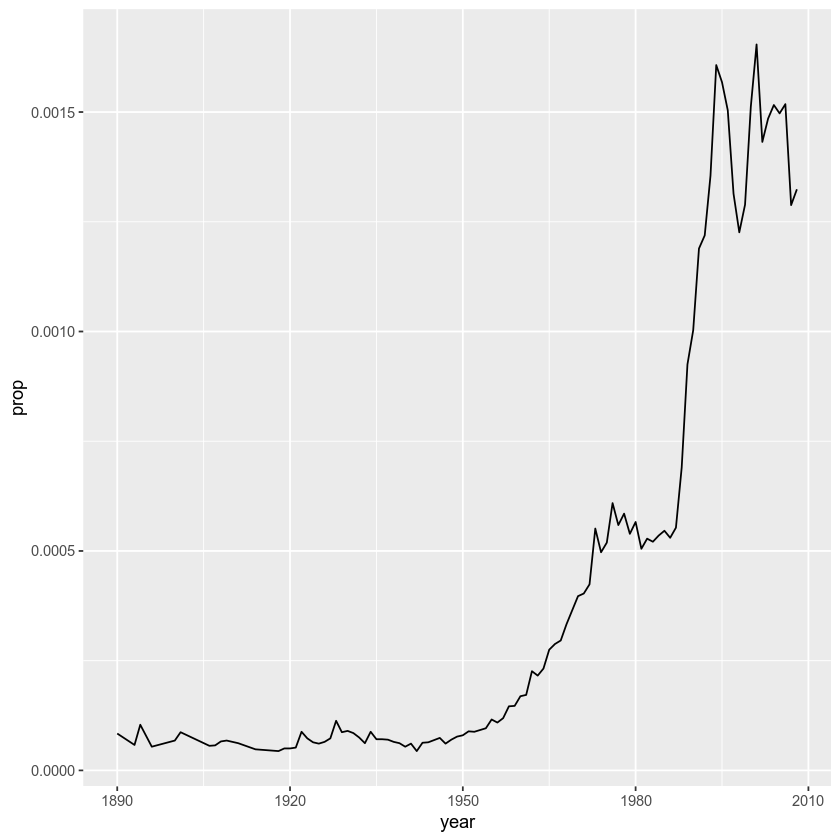

In [17]:
library(ggplot2)
qplot(x = year, y = prop, data = ed, geom = 'line')

#### Ejercicio

Intenta con tu nombre!

Tomemos otro nombre al azar, por ejemplo, "Michelle":

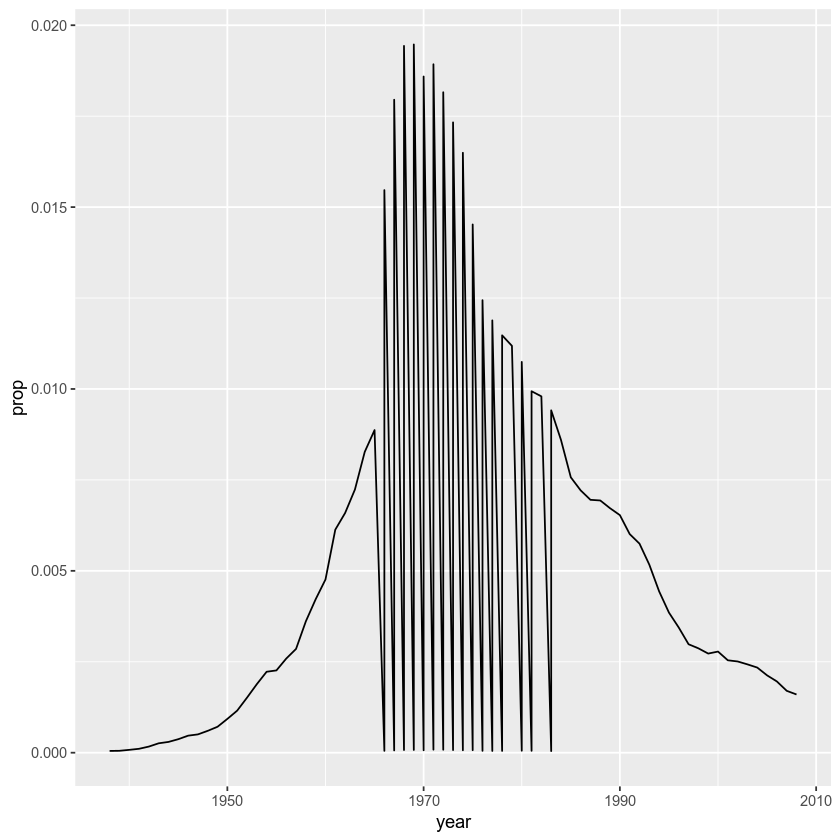

In [18]:
michelle <- subset(bnames2, name == "Michelle")
qplot(x = year, y = prop, data = michelle, geom = 'line')

Esto se ve sucio, ¿por qué razón podría ser?

Grafiquemos los mismos datos usando `point` en lugar de `line`.

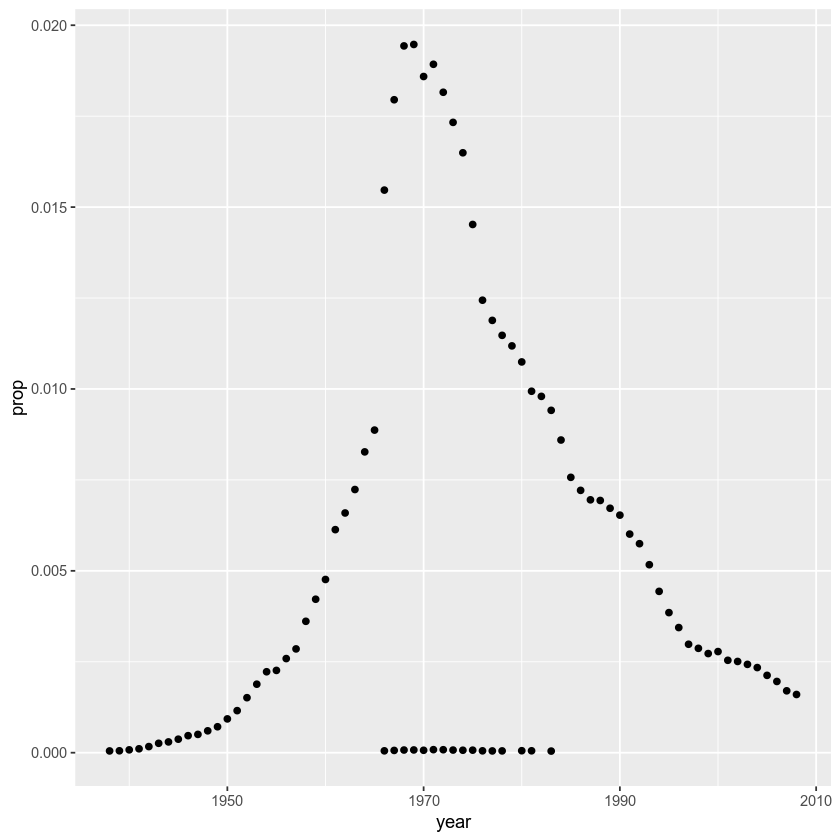

In [19]:
qplot(x = year, y = prop, data = michelle, geom = 'point')

Parecen haber dos agrupaciones de datos. Esto no debería sorprender sabiendo que el nombre Michelle es usado para niños y niñas (al menos en Estados Unidos). En ese caso, podemos indicarle a ggplot que haga el gráfico de línea por sexo (sex):

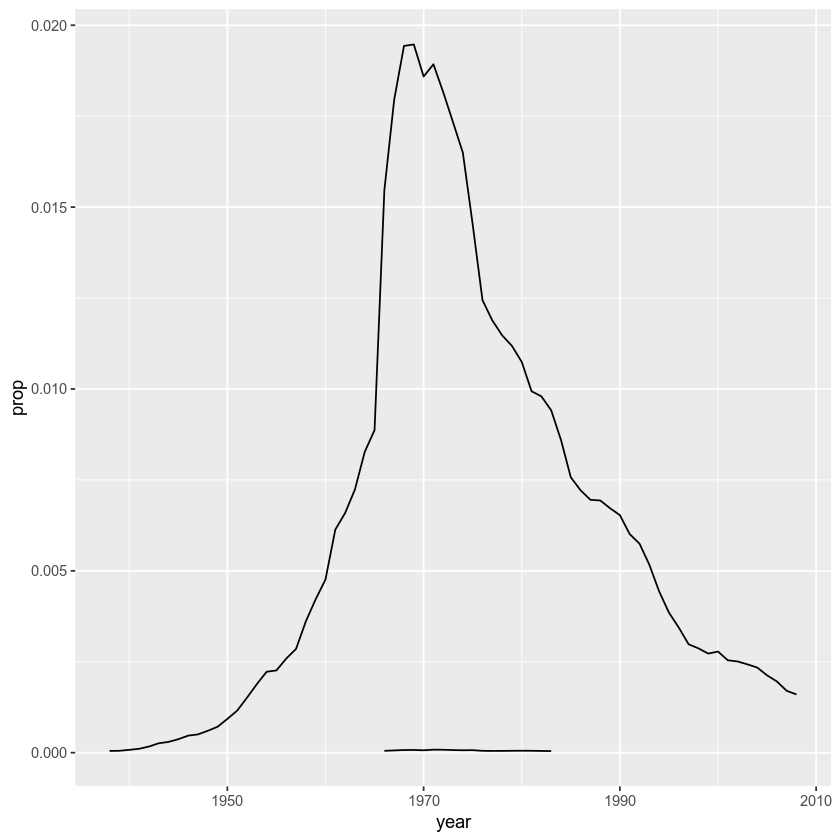

In [20]:
qplot(x = year, y = prop, data = michelle, geom = 'line', group = sex)

Nota que también podríamos decirle a `qplot` el color de las líneas basadas en `sex`, usando `color=sex` al usar la función. No tenemos que usar el argumento `group`, ya que `qplot` lo hará automáticamente para nosotros.

### Ejercicio 1

Repita el mismo ejercicio que hicimos para `name` con la variable `soundex`. En otras palabras, use la variable `soundex` para extraer todos los nombres que suenan como el tuyo y su gráfico de popularidad a través del tiempo. Asegúrate de estar seguro del `geom` que usarás.

Si tuviéramos que hallar la popularidad de un específico `soundex`, necesitamos resumir (`summarize`) los datos agregando los valores de prop para todos los nombres con el mismo soundex. Una vez más, mientras que la base de R tiene todas las herramientas para cumplir esto directamente, el paquete `plyr` también podrá ser de gran utilidad, ya que tiene muchos "verbos" para manipular los datos.

### Verbos de manipulación de datos

Es bueno pensar en la manipulación de datos en términos de verbos. Hay algunos verbos básicos:

* `subset`
* `mutate`
* `arrange`
* `summarize`
* `join`

Otro verbo importante que es usando en conjunto con los 5 anteriores, es `group`. Veremos como usarlos a lo largo de la guía.

## Nacimientos

Suponga que queremos explorar las tendencias sobre el total de gente con un nombre en específico a lo largo de los años. El dataset de nombres sólo tiene las proporciones. Afortunadamente, el dataset de nacimientos (https://ramnathv.github.io/pycon2014-r/explore/data/births.csv) tiene el número total de nacimientos, con sexo y año:

year,sex,births
<int>,<fct>,<int>
1880,boy,118405
1881,boy,108290
1882,boy,122034
1883,boy,112487
1884,boy,122745
1885,boy,115948


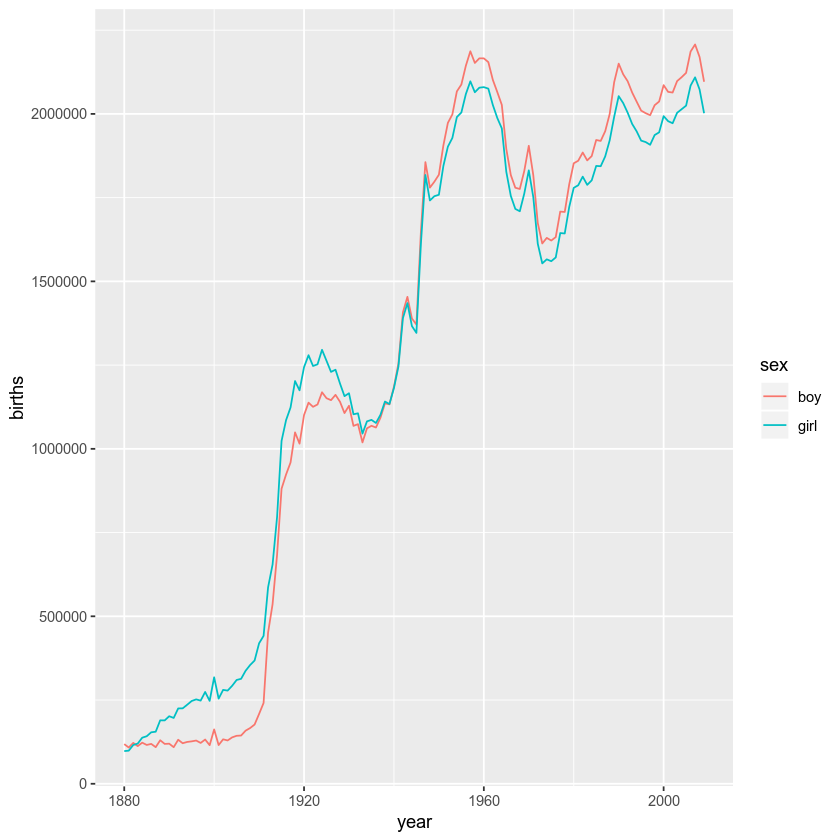

In [22]:
births <- read.csv("births.csv")
head(births)
qplot(year, births, data = births, color = sex, geom = 'line')

#### Pregunta:
¿Por qué los peacks?

### Join

Volviendo a la pregunta  hecha anteriormente, necesitamos "unir" los datos de nacimientos con el dataset de nombres. Existe la función `merge` en R, pero usemos `join` de `plyr`:

In [26]:
library(plyr)
bnames2_b <- join(bnames2, births, by = c("sex", "year"))
head(bnames2_b)

year,name,prop,sex,soundex,births
<int>,<fct>,<dbl>,<fct>,<fct>,<int>
1880,John,0.081541,boy,J500,118405
1880,William,0.080511,boy,W450,118405
1880,James,0.050057,boy,J520,118405
1880,Charles,0.045167,boy,C642,118405
1880,George,0.043292,boy,G620,118405
1880,Frank,0.027380,boy,F652,118405


Hay muchísimas formas de "unir" (`join`) los datos, especialmente manejando las filas/columnas que no están presentes en los dos datasets que son unidos (merged). Aquí hay un grupo de diagramas de Venn para ilustrar las posibilidades. La función `join` puede hacer la mayoría usando los argumentos `type` y `match`. También puedes leer la documentación con `?join` para tener más detalles.

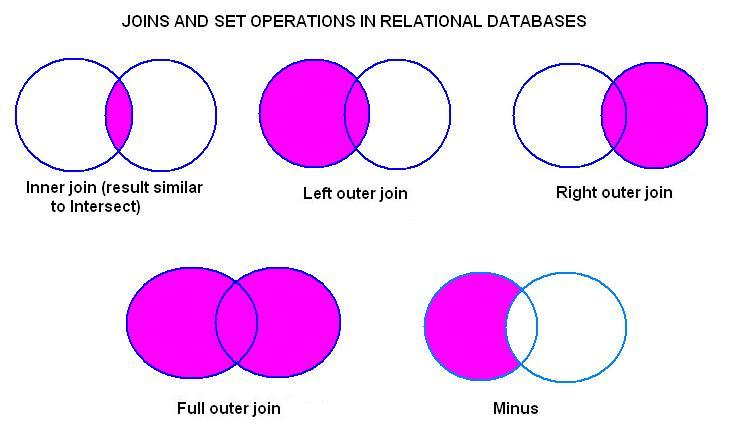

Ahora tenemos todos los datos requeridos para hacer ele ejercicio de exploración, empecemos con

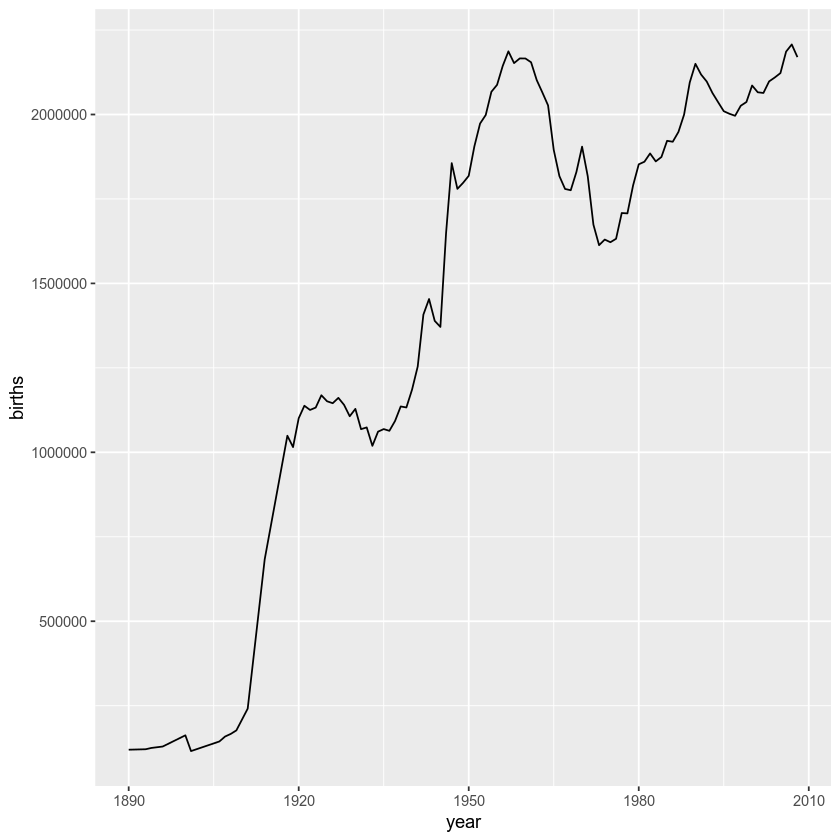

In [27]:
ed <- subset(bnames2_b, name == 'Eduardo')
ed <- mutate(ed, tot = prop * births)
qplot(year, births, data = ed, geom = 'line')

Vaya vaya, esto se ve mucho mejor, mi nombre está teniendo una mayor tendencia. Explóralo con tu nombre:

### Ejercicio 2

¿Cuál es el nombre más popular entre los años 1880 - 2008? ¿Cómo saberlo?

¿Cómo lo hacemos para todos los nombres?
1. **Separar** el dataset por nombre
2. **Aplicar** el estadístico de resumen para todos los nombres.
3. **Combinar** los estadísticos de resumen creados en un solo dataset.

Implementemos esto en código:

Para responder la pregunta, debemos ordenar los datos de `tot` en orden descendente:

### Ejercicio 3

Suponga que queremos encontrar el `soundex` más popular a lo largo de los años. Mira a lo largo del código que hemos usado y ve qué líneas necesitas cambiar. Ejecuta el código si tienes el tiempo.

El patrón **Separa-Aplica-Combina** es frecuentemente usado en los problemas de análisis de datos.